# Análisis Exploratorio de "German Credit Data"

In [ ]:
import numpy as np
import pandas as pd

### LIBRERIAS PARA GRAFICAR
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install ucimlrepo

### Importacion de datos

In [ ]:
from ucimlrepo import fetch_ucirepo

# Descargar dataset con ID 144
statlog_german_credit_data = fetch_ucirepo(id=144)

# Guardar todo el dataset en un DataFrame
df = statlog_german_credit_data.data.original

# Mostrar las 5 primeras filas
df.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
print("\nInformación general:")
print(df.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attrib

In [ ]:
#Info de las variables
print(statlog_german_credit_data.variables)


           name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feature  Categ

In [ ]:
# Excluimos variables de tipo Integer y vizualizamos los posibles valores de las columnas categóricas y binarias
categorical_values = {}
for col in df:
  if col not in {'Attribute2', 'Attribute5',
                 'Attribute8', 'Attribute11',
                 'Attribute13','Attribute16',
                 'Attribute18'}:
    categorical_values[col] = pd.Series(df[col].value_counts().index.values)
categorical_values_df = pd.DataFrame(categorical_values).fillna('')
categorical_values_df.T

,0,1,2,3,4,5,6,7,8,9
Attribute1,A14,A11,A12,A13,,,,,,
Attribute3,A32,A34,A33,A31,A30,,,,,
Attribute4,A43,A40,A42,A41,A49,A46,A45,A44,A410,A48
Attribute6,A61,A65,A62,A63,A64,,,,,
Attribute7,A73,A75,A74,A72,A71,,,,,
Attribute9,A93,A92,A94,A91,,,,,,
Attribute10,A101,A103,A102,,,,,,,
Attribute12,A123,A121,A122,A124,,,,,,
Attribute14,A143,A141,A142,,,,,,,
Attribute15,A152,A151,A153,,,,,,,


In [ ]:
#Estadisticas descriptivas de las variables numéricas
df.describe()

,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
#Cantidad de individuos caracterizados como 1: Bueno 2:Malo
df['class'].value_counts()

,count
class,
1,700
2,300


En principio vemos el tamaño de las muestras para las categorias de genero/estado civil que estan juntas en una variable y de la variable edad.
Esta informacion es el Atributo 9 que separa en:

*  A91 : male   : divorced/separated
*  A92 : female : divorced/separated/married
*  A93 : male   : single
*  A94 : male   : married/widowed
* A95 : female : single

y el atributo 13 que es un numero. Viendo las categorias en el atributo 9 notamos que no hay una categoria de mujeres casadas por separado de divorciadas/ separadas, aunque para el caso de los hombres si existe esa categoria.





In [ ]:
df["Attribute9"].value_counts(normalize=True)

,proportion
Attribute9,
A93,0.548
A92,0.310
A94,0.092
A91,0.050


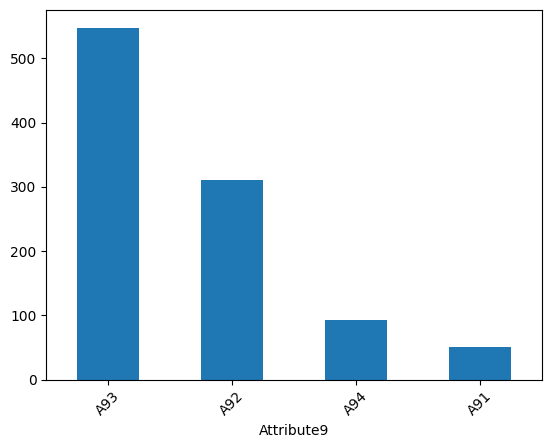

In [ ]:
df["Attribute9"].value_counts().plot(kind='bar', rot=45);

Attribute13
27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
44    17
41    17
43    17
47    17
45    15
21    14
49    14
20    14
50    12
48    12
54    10
57     9
52     9
63     8
51     8
55     8
53     7
61     7
60     6
66     5
65     5
58     5
64     5
74     4
67     3
56     3
59     3
68     3
19     2
75     2
62     2
70     1
Name: count, dtype: int64
Attribute13
27    0.051
26    0.050
23    0.048
24    0.044
28    0.043
25    0.041
30    0.040
35    0.040
36    0.039
31    0.038
29    0.037
32    0.034
33    0.033
34    0.032
37    0.029
22    0.027
40    0.025
38    0.024
42    0.022
39    0.021
46    0.018
44    0.017
41    0.017
43    0.017
47    0.017
45    0.015
21    0.014
49    0.014
20    0.014
50    0.012
48    0.012
54    0.010
57    0.009
52    0.009
63    0.008
51    0.008
55    0.008
53    0.007
61    0.007
60   

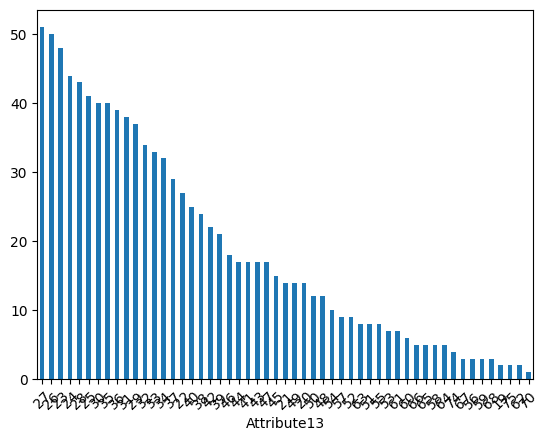

In [ ]:
print(df["Attribute13"].value_counts())
print(df["Attribute13"].value_counts(normalize=True))
df["Attribute13"].value_counts().plot(kind='bar', rot=45);

Hay valores muchos valores distintos por lo que para ver mejor armamos grupos de edades

In [ ]:
def grupo_edad(edad):
    if edad < 20:
        return '<20'
    elif 20 <= edad < 30:
        return '20 a 29'
    elif 30 <= edad < 40:
        return '30 a 39'
    elif 40 <= edad < 50:
        return '40 a 49'
    elif 50 <= edad < 60:
        return '50 a 59'
    elif 60 <= edad < 70:
        return '60 a 69'
    elif 70 <= edad < 80:
        return '70 a 79'
    else:
        return '+80'